# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Analisis de Grandes Volumenes de Datos**

### Tecnológico de Monterrey

## Actividad : Sistema de Recomendación


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importamos el archivo convertido csv a un dataframe
df = pd.read_csv('/content/steam_reviews.csv')
df.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


In [ ]:
# Usamos info para saber la cantidad de reviews y confirmar los campos que podemos analizar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434891 entries, 0 to 434890
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   date_posted             434891 non-null  object
 1   funny                   434891 non-null  int64 
 2   helpful                 434891 non-null  int64 
 3   hour_played             434891 non-null  int64 
 4   is_early_access_review  434891 non-null  bool  
 5   recommendation          434891 non-null  object
 6   review                  433375 non-null  object
 7   title                   434891 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 23.6+ MB


*   date_posted : Fecha de la reseña
* funny: Cuantos jugadores piensan que la reseña es chistosa
* helpful: cuantos jugadores piensan que la reseña es útil
* hours_played: cuantas horas jugó antes de publicar la review
* is_early_acces_review: si la review fue publicada en un programa early access
* recommendation: Si recomienda el juego o no
* review: la reseña
* title: nombre del juego


In [ ]:
# Medidas de estadística descriptiva de las reviews de
df.describe()

,funny,helpful,hour_played
count,4.348910e+05,434891.000000,434891.000000
mean,5.333024e+05,1.004114,364.130773
std,4.785640e+07,59.462935,545.961198
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,62.000000
50%,0.000000e+00,0.000000,190.000000
75%,0.000000e+00,0.000000,450.000000
max,4.294967e+09,28171.000000,31962.000000


In [ ]:
# Como preprocesamiento analizamos cuantos reviews son de cero horas y de tres horas o menos
cero_horas = df[df['hour_played'] == 0]
print(len(cero_horas))

tres_horas = df[df['hour_played'] <= 3]
print(len(tres_horas))


6258
18100


In [ ]:
# Eliminamos estos registros, para evitar el review-bombing
# El review bombing es cuando muchos usuarios dan buena o mala calificación a algo en un sistema en linea
# EL review bombing se hace para jugar con el sistema de calificaciones
df = df[df['hour_played'] > 3]
len(df)

416791

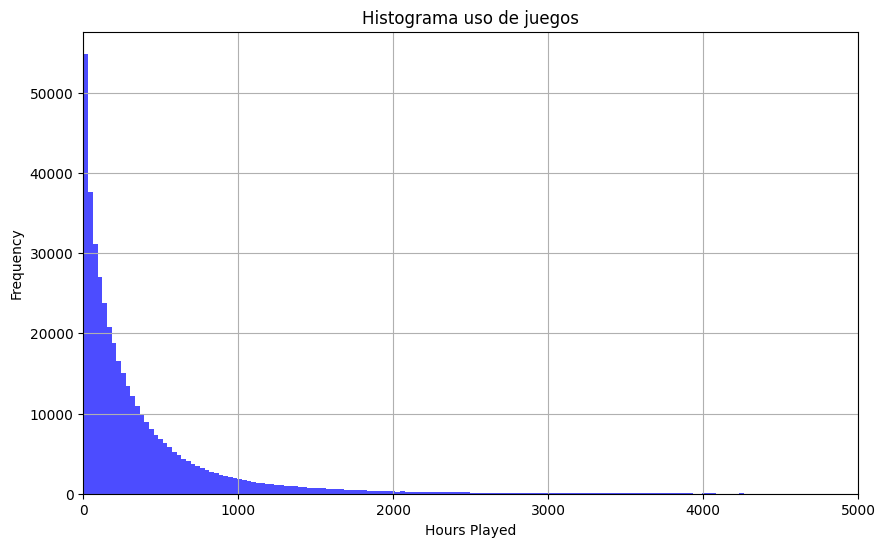

In [ ]:
# Se identifica en info() que hay usuarios que dan review aunque jueguen cero horas
# Esto puede ser por razones que no tienen nada que ver con el juego en sí
# En el mercado hay ejemplos de reviews malos porque el juego les pide crearse una cuenta adicional o por ideología
# Los usuarios podrían agregar el juego a sus cuentas, dejar un review y exigir la devolución, jugando con el sistema
# La mayoría de los juegos de 60 dólares, se juegan 100 horas o menos, por exeriencia y porque el gráfico lo muestra
# Solo los juegos como servicio o que fueron hechos para ser muy largos se juegan más de 100-200 horas
# Hay un conjunto muy bajo de usuarios que juegan mucho, un solo jugador registró 12,700 horas que equivale a casi un año y medio en el juego

plt.figure(figsize=(10, 6))
plt.hist(df['hour_played'], bins=range(min(df['hour_played']), max(df['hour_played']) + 30, 30), color='blue', alpha=0.7)
plt.title('Histograma uso de juegos')
plt.xlabel('Hours Played')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0, 5000)
plt.show()


In [ ]:
# top 10 juegos con más reviews
mas_analizados = df.groupby('title').size().sort_values(ascending=False)
print(mas_analizados.head(10))

title
PLAYERUNKNOWN'S BATTLEGROUNDS                  141273
Grand Theft Auto V                              97272
Rust                                            66887
Rocket League®                                  64675
Dead by Daylight                                20109
MONSTER HUNTER: WORLD                           17590
ASTRONEER                                        2492
RESIDENT EVIL 2 / BIOHAZARD RE:2                 1344
The Elder Scrolls V: Skyrim Special Edition      1221
Sid Meier’s Civilization® VI                      503
dtype: int64


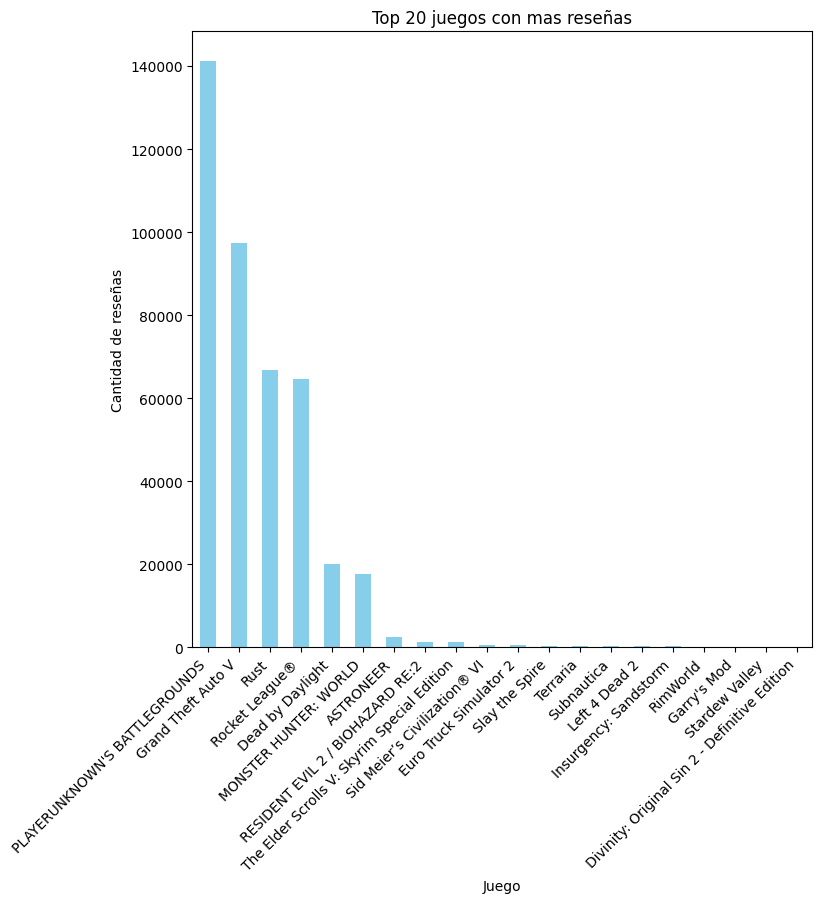

In [ ]:
plt.figure(figsize=(8, 8))
mas_analizados.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 juegos con mas reseñas')
plt.xlabel('Juego')
plt.ylabel('Cantidad de reseñas')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Top 20 juegos con mas reseñas positivas
mas_analizados_positivos = df[df['recommendation'] == 'Recommended'].groupby('title').size().sort_values(ascending=False)
print(mas_analizados_positivos.head(20))

title
PLAYERUNKNOWN'S BATTLEGROUNDS                    85777
Rocket League®                                   59371
Grand Theft Auto V                               57933
Rust                                             54338
Dead by Daylight                                 16118
MONSTER HUNTER: WORLD                            14138
ASTRONEER                                         2414
RESIDENT EVIL 2 / BIOHAZARD RE:2                  1336
The Elder Scrolls V: Skyrim Special Edition        890
Euro Truck Simulator 2                             477
Sid Meier’s Civilization® VI                       348
Terraria                                           257
Slay the Spire                                     257
Subnautica                                         243
Left 4 Dead 2                                      212
RimWorld                                           203
Insurgency: Sandstorm                              199
Stardew Valley                                     199
Garr

In [ ]:
# Resulta que los juegos con mas reviews positivas tambien tienen muchas reviews negativas
# Ademas , las reseñas negativas bajan muchísimo conforme avanzamos hacia abajo en el ranking
# Top 20 juegos con mas reseñas negativas
mas_analizados_negativos = df[df['recommendation'] == 'Not Recommended'].groupby('title').size().sort_values(ascending=False)
print(mas_analizados_negativos.head(20))

title
PLAYERUNKNOWN'S BATTLEGROUNDS                    55496
Grand Theft Auto V                               39339
Rust                                             12549
Rocket League®                                    5304
Dead by Daylight                                  3991
MONSTER HUNTER: WORLD                             3452
The Elder Scrolls V: Skyrim Special Edition        331
Sid Meier’s Civilization® VI                       155
ARK: Survival Evolved                              137
ASTRONEER                                           78
Divinity: Original Sin 2 - Definitive Edition       17
NBA 2K19                                            10
Insurgency: Sandstorm                                9
RESIDENT EVIL 2 / BIOHAZARD RE:2                     8
Human: Fall Flat                                     7
Football Manager 2019                                6
Pathfinder: Kingmaker                                6
Garry's Mod                                          6
Moon

In [ ]:
# Analisis con los juegos con mayor proporcion de reviews positivos
df['review_binario'] = df['recommendation'].apply(lambda x: 1 if x == 'Recommended' else 0)

porcentaje_review_buenos = df.groupby('title')['review_binario'].mean() * 100
print(porcentaje_review_buenos.sort_values(ascending=False).head(30))


title
ACE COMBAT™ 7: SKIES UNKNOWN                     100.000000
Foundation                                       100.000000
Wallpaper Engine                                 100.000000
Tom Clancy's Rainbow Six® Siege                  100.000000
Tannenberg                                       100.000000
Subnautica: Below Zero                           100.000000
Subnautica                                       100.000000
Stardew Valley                                   100.000000
RimWorld                                         100.000000
Kenshi                                           100.000000
GOD EATER 3                                      100.000000
My Time At Portia                                100.000000
Don't Starve Together                            100.000000
Euro Truck Simulator 2                           100.000000
Beat Saber                                       100.000000
Cold Waters                                      100.000000
Warhammer 40,000: Mechanicus      

In [ ]:
# Ya podemos ver que hay problemas con el dataset porque hay juegos que son muy divisivos
# Los juegos con mas valoraciones positivas en porcentaje, pueden tener pocas reseñas

df['review_bueno'] = df['recommendation'].apply(lambda x: 1 if x == 'Recommended' else 0)
df['review_malo'] = df['recommendation'].apply(lambda x: 0 if x == 'Recommended' else 1)

pivot_table = df.pivot_table(index='title', values=['review_bueno', 'review_malo'],
                               aggfunc='sum', fill_value=0)

pivot_table['porcentajes_positivos'] = (pivot_table['review_bueno'] /
                                      (pivot_table['review_bueno'] + pivot_table['review_malo'])) * 100

sorted_pivot_table = pivot_table.sort_values(by='porcentajes_positivos', ascending=False)

print(sorted_pivot_table.head(20))


                                             review_bueno  review_malo  \
title                                                                    
ACE COMBAT™ 7: SKIES UNKNOWN                            9            0   
Foundation                                              7            0   
Wallpaper Engine                                      144            0   
Tom Clancy's Rainbow Six® Siege                        10            0   
Tannenberg                                              9            0   
Subnautica: Below Zero                                  6            0   
Subnautica                                            243            0   
Stardew Valley                                        199            0   
RimWorld                                              203            0   
Kenshi                                                 10            0   
GOD EATER 3                                            10            0   
My Time At Portia                     

In [ ]:
# Lo mismo aplica para los juegos con porcentajes negativos
pivot_table['porcentajes_negativos'] = (pivot_table['review_malo'] /
                                      (pivot_table['review_bueno'] + pivot_table['review_malo'])) * 100

sorted_pivot_table = pivot_table.sort_values(by='porcentajes_negativos', ascending=False)

print(sorted_pivot_table.head(20))


                                               review_bueno  review_malo  \
title                                                                      
Sid Meier’s Civilization® VI: Rise and Fall               0            3   
NBA 2K19                                                  0           10   
Survivor Pass: Vikendi                                    0            3   
Sid Meier's Civilization® VI: Gathering Storm             0            3   
ARK: Survival Evolved                                    32          137   
Football Manager 2019                                     3            6   
Pathfinder: Kingmaker                                     4            6   
Moonlighter                                               5            5   
Grand Theft Auto V                                    57933        39339   
Farming Simulator 19                                      6            4   
PLAYERUNKNOWN'S BATTLEGROUNDS                         85777        55496   
Sid Meier’s 

In [ ]:
# Se aplica un promedio bayesiano para darle prioridad a los juegos que tienen mas reviews positivas considerando las totales
# Vemos que Ace Combat y Foundation a pesar de que parecen juegos buenos tienen pocas reviews
# Ahora los mas populares con criterio bayesiano son Rocket League, Astroneer y RE:2
# Con el promedio bayesiano, de los juegos con avg_rating simple de 100% solo aparece Subnautica que ahora tiene un bayesiano de 80%

df['binary_recommendation'] = df['recommendation'].apply(lambda x: 1 if x == 'Recommended' else 0)

ratings_per_game = df.groupby('title')['binary_recommendation'].agg(['count', 'mean'])
ratings_per_game.columns = ['N', 'avg_rating']

m = ratings_per_game['avg_rating'].mean()
C = ratings_per_game['N'].mean()

ratings_per_game['bayesian_avg'] = (C*m + ratings_per_game['N'] * ratings_per_game['avg_rating']) / (C + ratings_per_game['N'])

sorted_games_by_bayesian_average = ratings_per_game.sort_values(by='bayesian_avg', ascending=False)

print(sorted_games_by_bayesian_average.head(20))



                                                   N  avg_rating  bayesian_avg
title                                                                         
Rocket League®                                 64675    0.917990      0.903705
ASTRONEER                                       2492    0.968700      0.835523
RESIDENT EVIL 2 / BIOHAZARD RE:2                1344    0.994048      0.823673
Rust                                           66887    0.812385      0.810652
Euro Truck Simulator 2                           477    1.000000      0.807857
Terraria                                         258    0.996124      0.803039
Slay the Spire                                   259    0.992278      0.802950
Subnautica                                       243    1.000000      0.802820
Left 4 Dead 2                                    213    0.995305      0.802043
RimWorld                                         203    1.000000      0.801933
Stardew Valley                                   199

NameError: name 'io' is not defined